In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
#from sklearn import datasets
#from sklearn import preprocessing
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (Input, Dense, Dropout, Activation,
                                     BatchNormalization, Flatten,
                                     Conv2D, MaxPooling2D,
                                     GlobalAveragePooling2D)

import os
import cv2

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 檢查有沒有 GPU
#import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
# Not enough GPU hardware devices available
# assert len(physical_devices) > 0

tf.config.experimental.set_memory_growth(physical_devices[0], True)

import tensorflow.keras.backend as K
K.clear_session()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


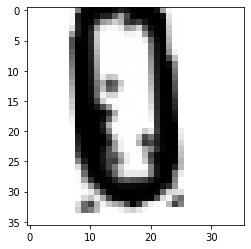

(36, 36)

In [2]:
image = cv2.imread(
    "/home/jovyan/test1/car_aug/0/0001.bmp", 0)
#    "/home/jovyan/at083-group23/car_plate_data/0/0001.bmp", 0)
#image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap="gray")
plt.show()
image.shape

In [3]:
image.ndim

2

In [4]:
image.dtype

dtype('uint8')

In [5]:
data_path = "/home/jovyan/test1/car_aug"
#data_path = "/home/jovyan/at083-group23/car_plate_data"

x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    for each in files:
        if each.find('checkpoint') == -1:
            x_data_list.append(os.path.join(roots, each))
            y_data_list.append(roots.split("/")[-1])

In [6]:
#img_size = 224
img_size = 36

/home/jovyan/test1/car_aug/H/0746.bmp
(36, 36)


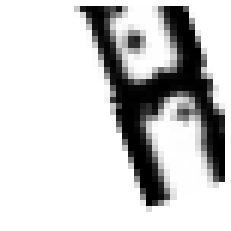

In [7]:
print(x_data_list[0])
img = cv2.imread(x_data_list[0], 0)
img = cv2.resize(img, (img_size, img_size))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

In [8]:
#img = img[..., np.newaxis]
print(img.shape)

(36, 36)


In [9]:
def load_img(data_list):
    data_img = []
    for each in tqdm(data_list):
        img = cv2.imread(each, 0)
        img = cv2.resize(img, (img_size, img_size))
        data_img.append(img[..., np.newaxis])
        #data_img.append(img)

    return np.array(data_img).astype('float32')/255.
#    return np.array(data_img).astype('float32')

In [10]:
x_data = load_img(x_data_list)

100%|██████████| 51795/51795 [00:01<00:00, 27509.57it/s]


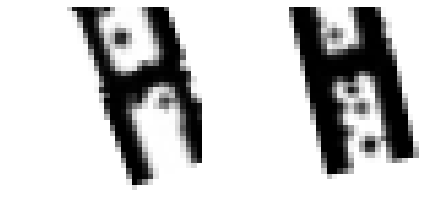

In [11]:
# show image
plt.figure(figsize=(16, 8))
for i in range(2):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_data[i][..., 0], cmap='gray')
    #plt.imshow(x_data[i][:, :, ::-1])
    plt.axis('off')
plt.show()

In [12]:
y_data_list = pd.DataFrame(y_data_list, columns=['label'])
uniques = y_data_list['label'].value_counts().index
counts = y_data_list['label'].value_counts().values
#print(y_data_list.sample(10))
print(uniques)
print('10 + 24 =', uniques.size)

Index(['9', '7', '5', '1', '3', 'A', '8', '2', '0', 'Z', 'M', 'L', '4', 'C',
       'Y', 'Q', 'N', 'E', 'K', 'P', 'H', 'G', 'X', 'V', '6', 'W', 'T', 'F',
       'R', 'D', 'J', 'U', 'B', 'S'],
      dtype='object')
10 + 24 = 34


In [13]:
a = pd.DataFrame(uniques.sort_values(), columns=['label'])
print(a.info())
print(a.head(15))

a.to_csv('/home/jovyan/at083-group23/mapping.txt', float_format=None, 
         columns=['label'], index=True, index_label='idx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 1 columns):
label    34 non-null object
dtypes: object(1)
memory usage: 400.0+ bytes
None
   label
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10     A
11     B
12     C
13     D
14     E


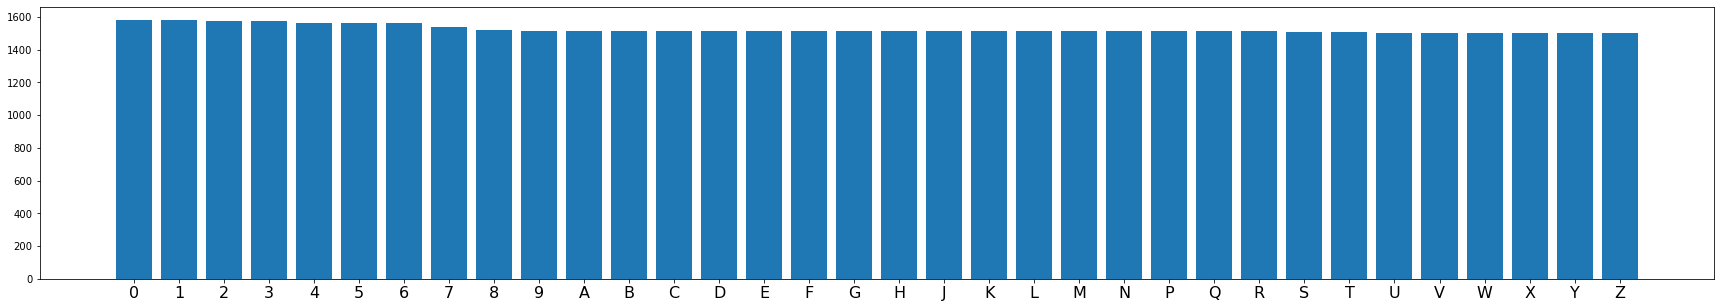

In [14]:
plt.figure(figsize=(30, 5))
plt.bar(uniques.sort_values(), counts)
plt.xticks(fontsize=16)
plt.show()

In [15]:
class_path = "/home/jovyan/at083-group23/"
class_map = pd.read_csv(os.path.join(class_path, 'mapping.txt'),
                        header=0, names=['label', 'idx'], index_col=['idx'], 
                        usecols=None, dtype=None)
print(class_map.info())
print(class_map.head(15))
class_map = class_map.to_dict()['label']

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to Z
Data columns (total 1 columns):
label    34 non-null int64
dtypes: int64(1)
memory usage: 544.0+ bytes
None
     label
idx       
0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
A       10
B       11
C       12
D       13
E       14


In [16]:
class_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'P': 23,
 'Q': 24,
 'R': 25,
 'S': 26,
 'T': 27,
 'U': 28,
 'V': 29,
 'W': 30,
 'X': 31,
 'Y': 32,
 'Z': 33}

In [17]:
y_data = y_data_list['label'].map(class_map).values.copy()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1,
                                                    random_state=10,
                                                    stratify=y_data)

In [18]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (46615, 36, 36, 1)
x_test shape: (5180, 36, 36, 1)


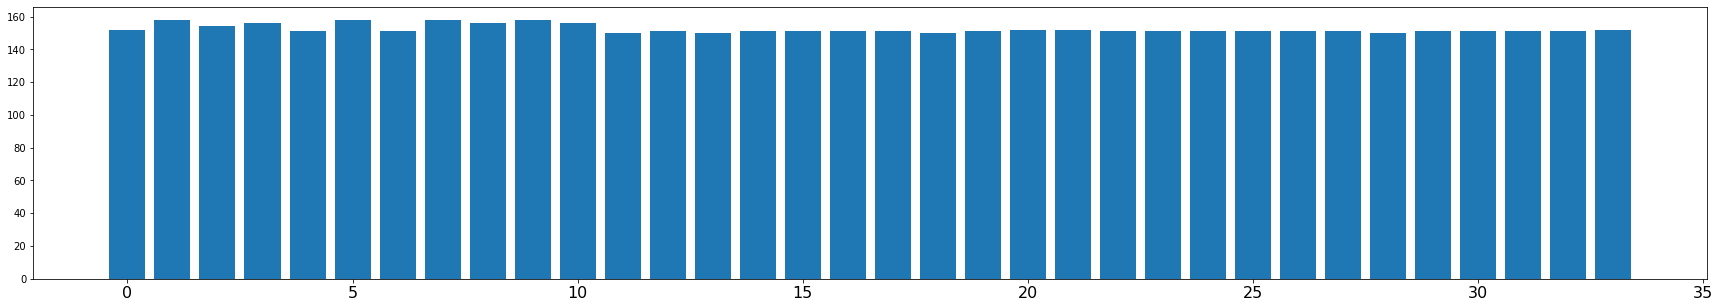

In [19]:
uniques, counts = np.unique(y_test, return_counts=True)
plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

In [20]:
y_train[0:10]    # 0:10筆的類別

array([ 4, 14,  9,  3, 20, 31, 33, 19, 32, 16])

In [21]:
# 將訓練資料與測試資料的 label，進行 Onehot encoding 轉換
num_classes = len(uniques)

y_train = np.eye(num_classes, dtype='float32')[y_train]
y_test = np.eye(num_classes, dtype='float32')[y_test]

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (46615, 34)
y_test shape: (5180, 34)


In [22]:
# Flatten the input data

x_train = Flatten()(x_train)
x_train = x_train.numpy()
x_test = Flatten()(x_test)
x_test = x_test.numpy()

In [23]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (46615, 1296)
x_test shape: (5180, 1296)


In [24]:
# 選擇 Keras 的 API 寫法 -- DNN

inputs = Input(shape=x_train.shape[1:])
#inputs = Input(shape=(img_size, img_size, 1))

# 第一層
# 設定ReLU為激活函數。
x = Dense(256, activation='relu')(inputs)

# 第二層 
# 設定ReLU為激活函數。
x = Dense(128, activation='relu')(x)

# 第三層 
# 設定ReLU為激活函數。
x = Dense(64, activation='relu')(x)

outputs = Dense(num_classes, activation='softmax')(x)


dnn_model = Model(inputs=inputs, outputs=outputs)

In [25]:
print(dnn_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1296)]            0         
_________________________________________________________________
dense (Dense)                (None, 256)               332032    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                2210      
Total params: 375,394
Trainable params: 375,394
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model_dir = 'dnn_model-logs-c'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

logfiles = model_dir + '/{}-{}'.format('basic_model', dnn_model.__class__.__name__)
model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                        histogram_freq=1)

modelfiles = model_dir + '/{}-best-model-c.h5'.format('basic_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_accuracy',
                                             save_best_only=True)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=5,
                                          verbose=1)


callbacks_list = [model_cbk, model_mckp, earlystop]

In [27]:
# 編譯模型
# 選用 Adam 為 optimizer
learning_rate = 1e-3
optimizer = keras.optimizers.Adam(lr=learning_rate)



dnn_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [28]:

batch_size = 32
epochs = 300

num_step = x_train.shape[0] // batch_size + 1


In [29]:

dnn_history = dnn_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            steps_per_epoch=num_step,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=2,
                            callbacks=callbacks_list)


Train on 46615 samples, validate on 5180 samples
Epoch 1/300
46615/46615 - 6s - loss: 1.8259 - accuracy: 0.4348 - val_loss: 0.9280 - val_accuracy: 0.6840
Epoch 2/300
46615/46615 - 5s - loss: 0.6439 - accuracy: 0.7750 - val_loss: 0.5169 - val_accuracy: 0.8205
Epoch 3/300
46615/46615 - 5s - loss: 0.4250 - accuracy: 0.8500 - val_loss: 0.4116 - val_accuracy: 0.8562
Epoch 4/300
46615/46615 - 5s - loss: 0.3269 - accuracy: 0.8829 - val_loss: 0.2970 - val_accuracy: 0.8959
Epoch 5/300
46615/46615 - 5s - loss: 0.2859 - accuracy: 0.8961 - val_loss: 0.3259 - val_accuracy: 0.8882
Epoch 6/300
46615/46615 - 5s - loss: 0.2522 - accuracy: 0.9096 - val_loss: 0.3040 - val_accuracy: 0.8911
Epoch 7/300
46615/46615 - 5s - loss: 0.2274 - accuracy: 0.9178 - val_loss: 0.2984 - val_accuracy: 0.8925
Epoch 8/300
46615/46615 - 4s - loss: 0.2041 - accuracy: 0.9252 - val_loss: 0.2847 - val_accuracy: 0.9042
Epoch 9/300
46615/46615 - 4s - loss: 0.1822 - accuracy: 0.9330 - val_loss: 0.1821 - val_accuracy: 0.9400
Epoch 

In [30]:
best_model = "./dnn_model-logs-c/basic_model-best-model-c.h5"
dnn_model = load_model(best_model)

In [31]:
loss, acc = dnn_model.evaluate(x_test, y_test, verbose=2)

5180/1 - 0s - loss: 0.1333 - accuracy: 0.9554


In [32]:
y_pred = dnn_model.predict(x_test)
print(y_pred[:3])
y_pred = y_pred.argmax(-1)
print(y_pred[:3])

[[2.6742596e-16 2.6182884e-22 0.0000000e+00 4.3534753e-29 3.1128627e-32
  2.8890711e-13 2.6447868e-13 0.0000000e+00 7.4676749e-19 9.6661341e-20
  4.9649730e-18 1.3444293e-10 7.0201059e-26 2.1352809e-15 0.0000000e+00
  3.7843865e-36 5.9294054e-12 6.3850134e-09 0.0000000e+00 4.8111582e-23
  2.1192737e-27 4.2981870e-14 1.0000000e+00 5.7317811e-35 7.3348992e-18
  3.0275638e-21 4.4163652e-23 0.0000000e+00 4.5799712e-14 6.8119714e-31
  1.0711831e-15 2.5302130e-36 1.8167999e-37 0.0000000e+00]
 [4.5121086e-12 2.4879966e-11 6.1873166e-08 3.6868628e-13 5.1515200e-18
  8.1422308e-12 1.1754493e-09 6.0455696e-11 1.5658084e-07 2.0069430e-12
  3.1428026e-29 5.1238217e-20 9.9999964e-01 1.8796515e-18 6.4120798e-09
  2.3135067e-10 3.5999200e-08 1.1856210e-19 6.0825947e-29 9.3996141e-23
  8.3536261e-11 8.1573797e-21 1.6696195e-30 3.4040364e-11 3.3936778e-18
  1.5122711e-14 7.6768352e-08 1.5680930e-13 2.3876231e-18 8.2343092e-24
  5.4914552e-30 4.9378052e-20 1.7311141e-18 5.2052011e-14]
 [8.8809608e-34 1.

In [33]:
print(accuracy_score(y_test.argmax(-1), y_pred))
#print(confusion_matrix(y_test.argmax(-1), y_pred))
confusion_matrix(y_test.argmax(-1), y_pred)

0.9554054054054054


array([[121,   0,   0, ...,   0,   0,   0],
       [  0, 154,   0, ...,   0,   0,   1],
       [  0,   0, 147, ...,   0,   0,   5],
       ...,
       [  0,   3,   0, ..., 146,   1,   0],
       [  0,   0,   0, ...,   0, 151,   0],
       [  0,   0,   8, ...,   0,   0, 141]])

In [34]:
class_names = np.array([each for each in class_map.keys()])

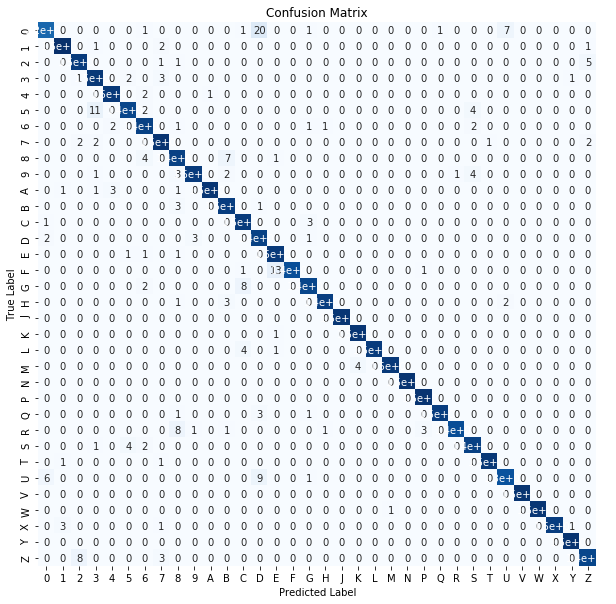

In [35]:
import seaborn as sns

matrix = confusion_matrix(y_test.argmax(-1), y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Save figure first to prevent black after show figure.
plt.savefig('./Confusion Matrix-c.png')

plt.show()